In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 

In [2]:
covid=pd.read_csv("covid_19_data.csv")
covid.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [3]:
covid.describe()

,SNo,Confirmed,Deaths,Recovered
count,6722.000000,6722.000000,6722.000000,6722.000000
mean,3361.500000,601.195924,19.855846,226.341267
std,1940.618587,4896.332140,204.486922,2556.035202
min,1.000000,0.000000,0.000000,0.000000
25%,1681.250000,2.000000,0.000000,0.000000
50%,3361.500000,13.000000,0.000000,0.000000
75%,5041.750000,108.000000,1.000000,11.000000
max,6722.000000,67800.000000,3122.000000,56927.000000


In [4]:
covid.columns

Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

In [5]:
covid.isnull().sum()

SNo                   0
ObservationDate       0
Province/State     2766
Country/Region        0
Last Update           0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64

In [6]:
covid.fillna(value="Unknown",inplace=True)
covid.isnull().sum()

SNo                0
ObservationDate    0
Province/State     0
Country/Region     0
Last Update        0
Confirmed          0
Deaths             0
Recovered          0
dtype: int64

In [7]:
covid = covid.groupby(covid['ObservationDate']).agg({'Confirmed' : 'sum', 'Deaths' : 'sum', 'Recovered' : 'sum'}).sort_values(by = 'ObservationDate', ascending = True).reset_index()
covid.head()

,ObservationDate,Confirmed,Deaths,Recovered
0,01/22/2020,555.0,17.0,28.0
1,01/23/2020,653.0,18.0,30.0
2,01/24/2020,941.0,26.0,36.0
3,01/25/2020,1438.0,42.0,39.0
4,01/26/2020,2118.0,56.0,52.0


In [8]:
infected=map(lambda a,b,c:a-b-c,covid.Confirmed, covid.Deaths, covid.Recovered)
infected=list(infected)
len(infected)

57

In [9]:
covid.insert(4, "Infected", infected, True)
covid.head()

,ObservationDate,Confirmed,Deaths,Recovered,Infected
0,01/22/2020,555.0,17.0,28.0,510.0
1,01/23/2020,653.0,18.0,30.0,605.0
2,01/24/2020,941.0,26.0,36.0,879.0
3,01/25/2020,1438.0,42.0,39.0,1357.0
4,01/26/2020,2118.0,56.0,52.0,2010.0


In [10]:
regression=LinearRegression()
x=np.array(np.arange(len(covid.ObservationDate))).reshape(-1,1)
y=covid[covid.columns[1:5]]

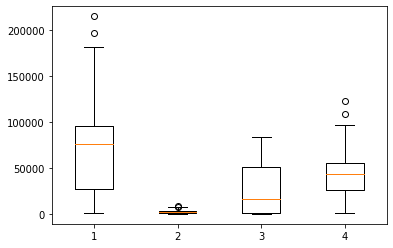

In [11]:

plt.boxplot(y);

In [12]:
def detect_outliers_iqr(data):
    outliers = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    for i in data:
        if (i < lwr_bound or i > upr_bound):
            outliers.append(i)
    return outliers
for i in covid.columns[1:5]:
    sample_outliers = detect_outliers_iqr(covid[i])
    print("Outliers from IQR method: ", len(sample_outliers))


Outliers from IQR method:  2
Outliers from IQR method:  2
Outliers from IQR method:  0
Outliers from IQR method:  2


In [13]:
a=[]

In [14]:
def remove_outlier(df_in, col_name):
    data=df_in[col_name]
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    IQR = q3-q1 
    lwr_bound  = q1-1.5*IQR
    upr_bound= q3+1.5*IQR
    df_out = np.clip(data, lwr_bound, upr_bound)
    return df_out
for i in covid.columns[1:5]:
    a.append(remove_outlier(covid, i))
a=np.array(a)
a=pd.DataFrame(a.reshape(4,57).T, columns=["Confirmed","Deaths","Recovered","Infected"])
a.head()

,Confirmed,Deaths,Recovered,Infected
0,555.0,17.0,28.0,510.0
1,653.0,18.0,30.0,605.0
2,941.0,26.0,36.0,879.0
3,1438.0,42.0,39.0,1357.0
4,2118.0,56.0,52.0,2010.0


In [15]:
a.insert(4, "ObservationDate", list(np.arange(len(covid.ObservationDate))), True)

In [16]:
for i in a.columns:
    sample_outliers = detect_outliers_iqr(a[i])
    print("Outliers from IQR method: ", len(sample_outliers))


Outliers from IQR method:  0
Outliers from IQR method:  0
Outliers from IQR method:  0
Outliers from IQR method:  0
Outliers from IQR method:  0


In [17]:
covid=a

In [58]:
y=covid["Infected"]
X=np.array(covid.ObservationDate).reshape(-1,1)

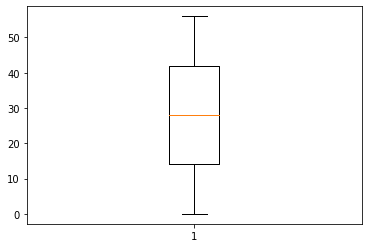

In [63]:
plt.boxplot(X);

In [64]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.33, random_state = 42)

In [65]:
regression.fit(X_train, y_train)

LinearRegression()

In [66]:
y_pred = regression.predict(X_test)
y_pred

array([ 3548.76680004, 10405.25967656, 44687.72405913, 21375.64827898,
       50172.91836034, 78970.18844171, 40573.82833322, 46059.02263443,
       65257.20268868, 20004.34970368, 67999.79983928,  7662.66252595,
       62514.60553807, 39202.52975792, 14519.15540246, 26860.84258019,
       11776.55825186,  9033.96110125, 58400.70981216])

In [85]:
y_test

0       510.0
5      2784.0
30    44541.0
13    22548.0
34    48243.0
55    99325.5
27    42659.0
31    45337.0
45    57306.0
12    18832.0
47    57971.0
3      1357.0
43    55702.0
26    42474.0
8      7921.0
17    33699.0
6      5340.0
4      2010.0
40    53255.0
Name: Infected, dtype: float64

In [67]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9252717338059279

In [68]:
regression.score(X_test,y_test)

0.9252717338059279

In [69]:
regression.coef_

array([1371.2985753])

In [70]:
regression.intercept_

3548.76680004019

In [71]:
regression.score(X_train,y_train)

0.8933014836295728

In [73]:
y_pred

array([ 3548.76680004, 10405.25967656, 44687.72405913, 21375.64827898,
       50172.91836034, 78970.18844171, 40573.82833322, 46059.02263443,
       65257.20268868, 20004.34970368, 67999.79983928,  7662.66252595,
       62514.60553807, 39202.52975792, 14519.15540246, 26860.84258019,
       11776.55825186,  9033.96110125, 58400.70981216])

In [74]:
y_test

0       510.0
5      2784.0
30    44541.0
13    22548.0
34    48243.0
55    99325.5
27    42659.0
31    45337.0
45    57306.0
12    18832.0
47    57971.0
3      1357.0
43    55702.0
26    42474.0
8      7921.0
17    33699.0
6      5340.0
4      2010.0
40    53255.0
Name: Infected, dtype: float64

In [75]:
vis_data = pd.DataFrame({'Actual Value' : y_test, 'Predicted Value' : y_pred})

<AxesSubplot:>

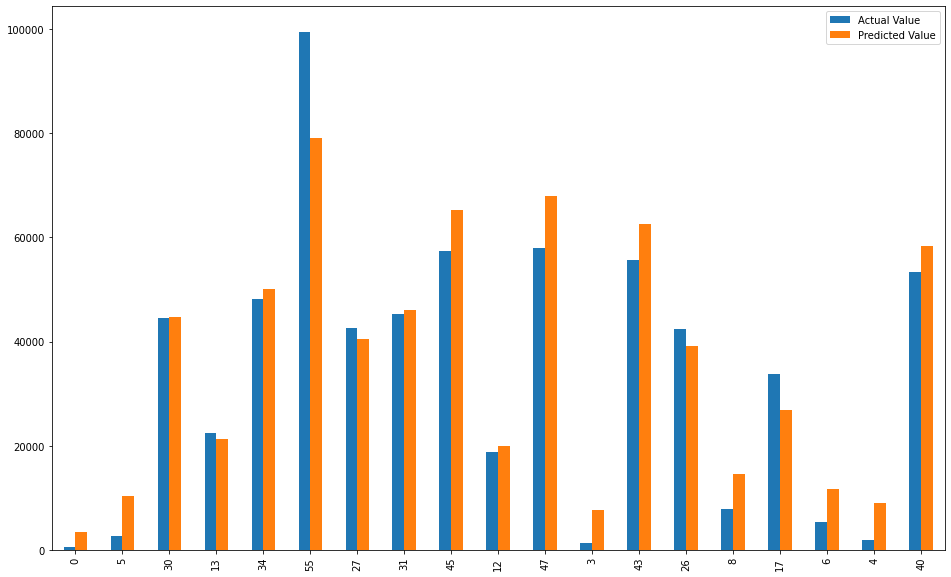

In [76]:
vis_data.plot(kind = "bar", figsize = (16,10))

In [90]:
regression.predict([[1]])

array([4920.06537534])

In [83]:
regression.score(X_test,y_test)

0.9252717338059279